In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
from scipy.special import binom

In [2]:
fparams =  {'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'font.size': 20,
            'legend.fontsize': 18,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path'}
plt.rcParams.update(fparams)

In [8]:
num = 4
nr = 20 # -- number of realizations

def pb(k, b):
    f = np.exp(-b * k) / (1 + np.exp(-b)) ** num * binom(num, k)
    return f

time = np.load('data/time.npy', allow_pickle = True)
p = np.load('data/p={}_nr={}.npy'.format(num, nr), allow_pickle = True)
pav = np.load('data/pav={}_nr={}.npy'.format(num, nr), allow_pickle = True)
S = np.load('data/S_N={}_nr={}.npy'.format(num, nr), allow_pickle = True)
SS2 = np.load('data/SS2_N={}_nr={}.npy'.format(num, nr), allow_pickle = True)
Sav = np.load('data/Sav_N={}_nr={}.npy'.format(num, nr), allow_pickle = True)
S2av = np.load('data/S2av_N={}_nr={}.npy'.format(num, nr), allow_pickle = True)
VarS = np.load('data/VarS_N={}_nr={}.npy'.format(num, nr), allow_pickle = True)

print(time)
print(len(time))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
10


In [9]:
dt_ind = 1
ones_arr = np.array([1 for i in range(len(time))])
S_eq = Sav[dt_ind:]
S_erg_v = np.sum(S_eq) / len(S_eq)
S_erg = S_erg_v * ones_arr
VarS_erg_v = np.sum(S2av[dt_ind:]) / len(S_eq) - (S_erg_v + num / 2) **2
VarS_erg = VarS_erg_v * ones_arr
print(time[dt_ind])
print(-S_erg_v)
print(VarS_erg_v)

1.0
1.0071893965671725
0.5199525185710372


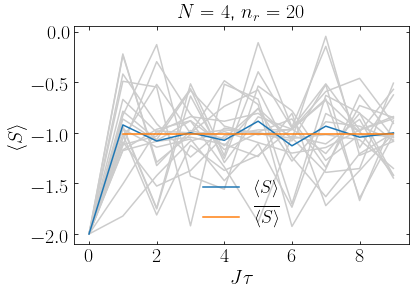

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num)+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(S)[j], color='0.8')
ax.plot(time, Sav,  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}.svg'.format(num, nr))

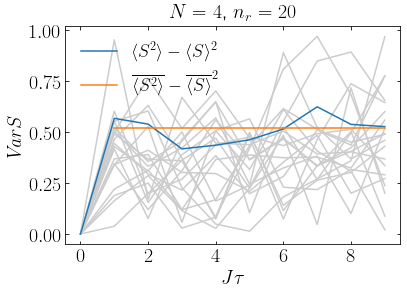

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num)+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(SS2)[j], color='0.8')
ax.plot(time, VarS,  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}.svg'.format(num, nr))

In [12]:
b_eff = np.arcsinh( - S_erg_v / VarS_erg_v)
print( - S_erg_v / VarS_erg_v )
print(b_eff)

1.9370795612937644
1.4151372280430674


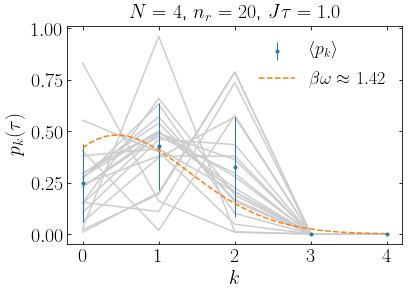

In [13]:
from matplotlib.ticker import MaxNLocator

t_ind = 1
keys = np.linspace(0, num, num+1)

fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num)+r'$n_r = $'+' ${}$, '.format(nr)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[t_ind], yerr = np.std(p[t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr + 1, elinewidth=1, label = r'$\langle p_k \rangle$') 
qs = np.linspace(0, num, 41)
ax.plot(qs, pb(qs, b_eff),  '--', color = 'tab:orange', zorder = nr + 2, label = r'$\beta \omega \approx $'+' ${}$'.format(round(b_eff,2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_tau={}.svg'.format(num, nr, time[t_ind]))